## Simulate non-cyanogenic evolution via drift alone

There is a finding that across a cline from less to more urban the frequency of a non-cyanogenic phenotype increases
The phenotype is genetically controlled by two loci, both of which have a segregating knock-out allele
If any individual is homozygous for either knockout they become non-cyanogenic

In this extremely simple simulation I create a 'population' which is represented by 2 lists of alleles (A/a and B/b)
To simulate evolution I randomly sample with replacement from the lists to create new list that represent the next generation.

By repeating this process with variable starting frequencies, population sizes and numbers of generations (functionally equivalent to steps in a strict stepping stone) we can look at the change in the frequency of cyanogenic and non-cyanogenic phenotypes


In [35]:
import random
from collections import OrderedDict

def sample_population(locus_A, locus_B, N):
    new_locus_A = [random.choice(locus_A) for _ in range(N)]
    new_locus_B = [random.choice(locus_B) for _ in range(N)]
    return new_locus_A, new_locus_B

def allele_freq(locus):
    p = sum(1*i.isupper() for i in locus)/float(len(locus))
    return p

# Given the frequency of A and the frequency of B, return the frequency of the 'acyanogenic' phenotype (i.e. recessive
# at either the A locus, B locus, or both) 
def phenotype(pA, pB):
    qA = 1-pA
    qB = 1-pB
    mut= qA**2 + qB**2 - (qA**2 * qB**2)
    WT = 1-mut
    return mut

# This function returns the proportion of all simulations that resulted in fixation of either phenotype.
def prop_fixed(big_dict):
    fixedU = 0
    fixedD = 0
    for s in big_dict[len(big_dict)-1]:
        if s[2] == 1.0:  # Index of 2 required to access third item in step_dict list (i.e. phenotype frequency)
            fixedU += 1
        if s[2] == 0.0:
            fixedD += 1
    return fixedU/float(sims), fixedD/float(sims)
  

# Randomly samples N alleles from locus A and locus B, calculates the frequency of both alleles followed by the frequency
# of 'acyanogenesis' phenotype and adds this frequency to step_dict list. Repeats process "step" times. Note that locus_A
# and locus_B are defined in the for loop. Therefore with each generation (i.e. step), loci are sampled from those sampled
# in the previous generation 
def cline(locus_A,locus_B, steps, N):
    step_dict = OrderedDict()
    for i in range(steps):
        #print i,
        locus_A, locus_B = (sample_population(locus_A,locus_B, N))
        pA, pB = allele_freq(locus_A), allele_freq(locus_B)
        #print pA, pB, phenotype(pA, pB)
        step_dict[i] = pA, pB, phenotype(pA, pB) # step_dict now contains individual allele frequencies in addition to phenotype frequencies
    return step_dict
    
        

In [36]:
# Initiate population with the following allele frequencies
pA = 0.5
pB = 0.5
qA = 1-pA
qB = 1-pB

# set the population size
N = 10
# Make the two lists based on the allele frequency to represent the initial population
locus_A = (['A'] * int(N*pA) ) + (['a'] * int(round(N*qA)) ) 
locus_B = (['B'] * int(N*pB) ) + (['b'] * int(round(N*qB)) ) 


####### sims simulations #####################
# We will simulate 'steps' iterations of resampling this population to simulate drift
# We will then repeat that simulation of 'steps' iterations 10000 times to get a mean
##############################################
sims = 10
steps = 5
#this stores the results of each simulation for analysis
big_dict = OrderedDict()
for s in range(steps): big_dict[s] = [] # Create as many empty dictionaries as there as steps (i.e. generations)
for i in range(sims):
    # reset the population for each iteration. I don't actually think this is necessary
    locus_A = (['A'] * int(N*pA) ) + (['a'] * int(round(N*qA)) ) 
    locus_B = (['B'] * int(N*pB) ) + (['b'] * int(round(N*qB)) ) 
    # This is one simulation 
    step_dict = cline(locus_A,locus_B, steps, N)
    # Store the result of each step in dictionary to allow summary later
    for s in step_dict: big_dict[s].append(step_dict[s])  # Append cline results to empty dictionary for each step of cline model
prop_fixed(big_dict)   

        
####
# now we have a dict
# with steps 1,2,3...25
# each step key corresponds to a list

(0.0, 0.0)

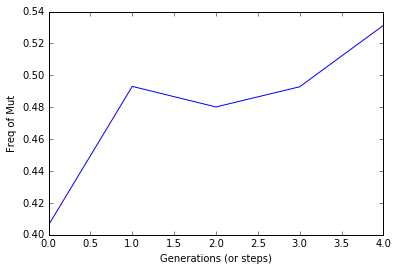

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline  

y = [sum(big_dict[s])/sims for s in big_dict.keys()]
x = big_dict.keys()

plt.plot(x,y)
plt.ylabel('Freq of Mut')
plt.xlabel('Generations (or steps)')
plt.show()

<function matplotlib.pyplot.show>

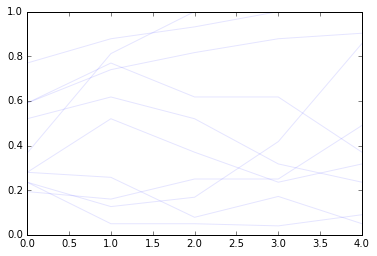

In [20]:
plt.figure(1)
plt.subplot(111)
for n in range(10):
    x = big_dict.keys()
    y = [big_dict[s][n] for s in big_dict]
    plt.plot(x, y, 'b-', alpha=0.1)


plt.show

In [44]:
len(big_dict)

5

In [37]:
big_dict

OrderedDict([(0,
              [(0.5, 0.7, 0.3175),
               (0.6, 0.6, 0.29440000000000005),
               (0.4, 0.3, 0.6735999999999999),
               (0.4, 0.6, 0.46240000000000003),
               (0.2, 0.6, 0.6976000000000001),
               (0.6, 0.5, 0.37),
               (0.6, 0.8, 0.19360000000000002),
               (0.6, 0.3, 0.5715999999999999),
               (0.5, 0.5, 0.4375),
               (0.6, 0.5, 0.37)]),
             (1,
              [(0.4, 0.8, 0.3856),
               (0.7, 0.4, 0.4176),
               (0.3, 0.2, 0.8164),
               (0.5, 0.7, 0.3175),
               (0.2, 0.5, 0.7300000000000001),
               (0.7, 0.4, 0.4176),
               (0.6, 0.6, 0.29440000000000005),
               (0.5, 0.3, 0.6175),
               (0.7, 0.5, 0.3175),
               (0.4, 0.8, 0.3856)]),
             (2,
              [(0.4, 0.7, 0.4176),
               (0.7, 0.4, 0.4176),
               (0.2, 0.3, 0.8164),
               (0.4, 0.8, 0.3856),
         

In [85]:
def prop_fixed(big_dict):
    fixedU = 0
    fixedD = 0
    for s in big_dict[len(big_dict)-1]:
        if s[2] == 1.0:
            fixedU += 1
        if s[2] == 0.0:
            fixedD += 1
    return fixedU/float(sims), fixedD/float(sims)

In [62]:
big_dict[4][1]

(0.5, 0.1, 0.8575)

In [86]:
prop_fixed(big_dict)

(0.1, 0.0)